<a href="https://colab.research.google.com/github/mohdaffamyhonest-max/Portofolio-Retail-Sales-Prediction-ML/blob/main/Sales_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor



In [61]:
# Load dataset
df = pd.read_csv("superstore_final_dataset (1).csv", encoding='latin1')

# Lihat 5 data teratas
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [62]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [63]:
df.isnull().sum()


,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


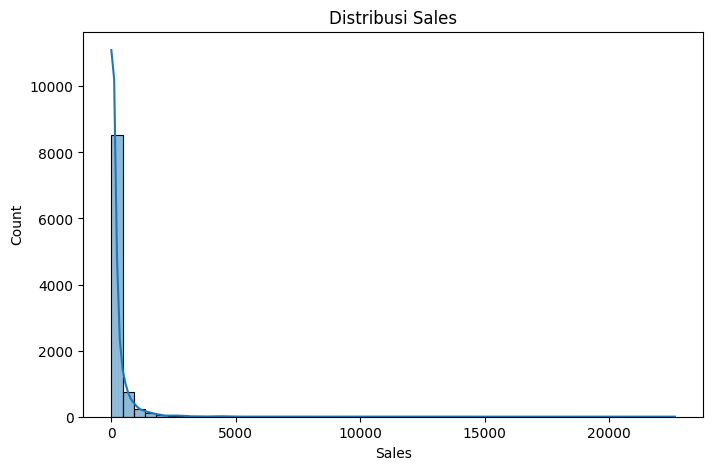

In [64]:
#Analisis Distribusi Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Distribusi Sales")
plt.show()


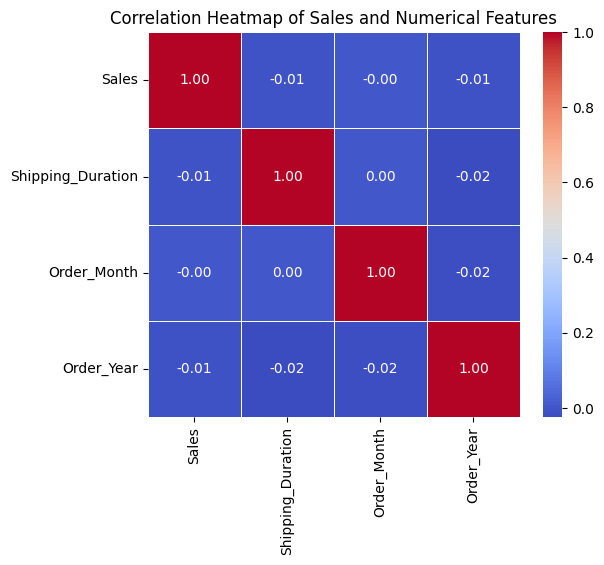

In [65]:
# Ambil hanya fitur numerik
numeric_df = df[['Sales']].copy()

# Tambahkan fitur numerik hasil feature engineering
numeric_df['Shipping_Duration'] = df_model['Shipping_Duration']
numeric_df['Order_Month'] = df_model['Order_Month']
numeric_df['Order_Year'] = df_model['Order_Year']

# Hitung correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title("Correlation Heatmap of Sales and Numerical Features")
plt.show()


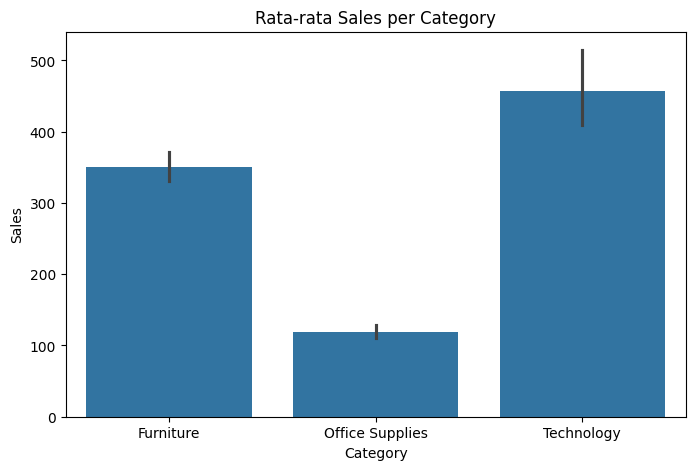

In [66]:
#Sales Berdasarkan Kategori
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator=np.mean)
plt.title("Rata-rata Sales per Category")
plt.show()


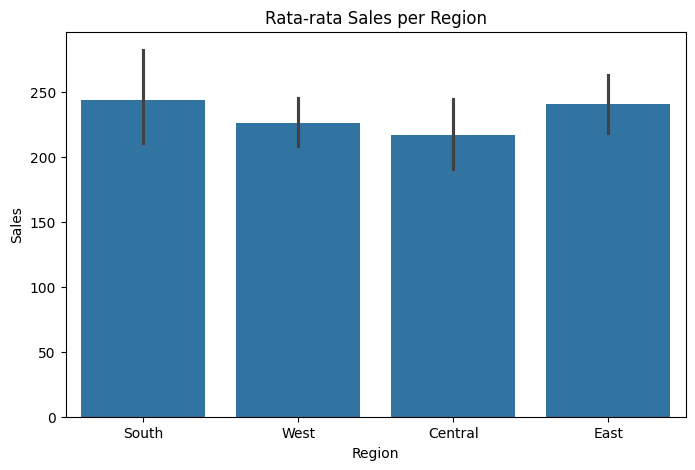

In [67]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Sales', estimator=np.mean)
plt.title("Rata-rata Sales per Region")
plt.show()


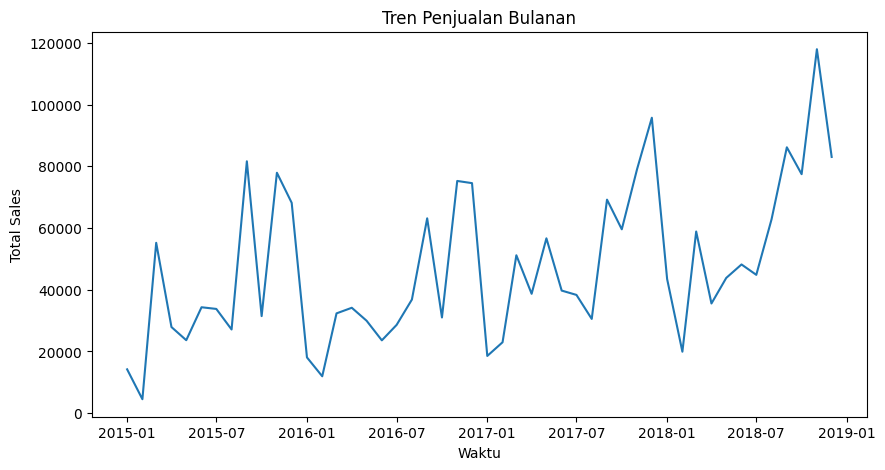

In [68]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

sales_time = df.groupby(df['Order_Date'].dt.to_period("M"))['Sales'].sum()
sales_time.index = sales_time.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(sales_time)
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Waktu")
plt.ylabel("Total Sales")
plt.show()

In [69]:
df_model = df.drop(columns=[
    'Order_Date',
    'Ship_Date',
    'Order_ID',
    'Customer_Name',
    'Product_Name',
    'Postal_Code',
    'Row_ID'
])


In [74]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Shipping_Duration'] = (df['Ship_Date'] - df['Order_Date']).dt.days


In [75]:
df_model = df.drop(columns=['Order_Date', 'Ship_Date'])


In [76]:
df_model = pd.get_dummies(df_model, drop_first=True)


In [77]:
X = df_model.drop('Sales', axis=1)
y = df_model['Sales']


In [78]:
X.select_dtypes(include=['datetime64'])


""
0
1
2
3
4
...
9795
9796
9797
9798


In [79]:
X = X.select_dtypes(exclude=['datetime64'])


In [81]:
from sklearn.ensemble import GradientBoostingRegressor

# Handle NaN values by dropping rows that contain them
# This ensures that X and y are aligned after dropping NaNs
valid_rows_mask = ~X.isnull().any(axis=1)
X_cleaned = X[valid_rows_mask]
y_cleaned = y[valid_rows_mask]

model = GradientBoostingRegressor(random_state=42)
model.fit(X_cleaned, y_cleaned)

GradientBoostingRegressor(random_state=42)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_cleaned)

mae = mean_absolute_error(y_cleaned, y_pred)
rmse = np.sqrt(mean_squared_error(y_cleaned, y_pred))
r2 = r2_score(y_cleaned, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

MAE  : 183.26
RMSE : 333.54
R²   : 0.7154


In [84]:
import pandas as pd

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
Product_Name_Canon imageCLASS 2200 Advanced Copier,0.203147
Product_ID_TEC-MA-10002412,0.093862
Product_Name_Cisco TelePresence System EX90 Videoconferencing Unit,0.084871
Sub_Category_Machines,0.047949
Category_Office Supplies,0.046343
Product_ID_TEC-CO-10004722,0.044709
Sub_Category_Copiers,0.041846
Order_ID_CA-2017-117121,0.029346
Product_ID_OFF-BI-10001120,0.019552
Product_ID_TEC-MA-10001047,0.019110


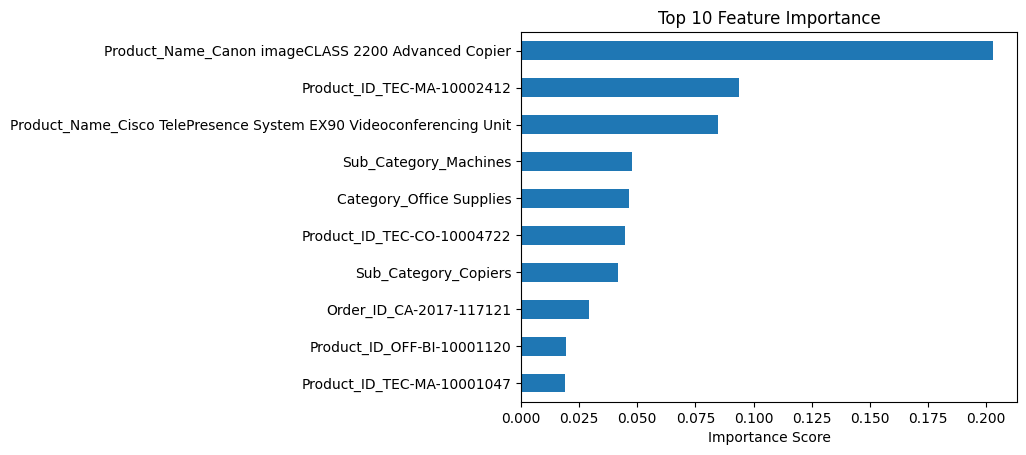

In [85]:
import matplotlib.pyplot as plt

feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()
